In [1]:
import os
import sys
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
import pubplot

In [2]:
os.environ['CODE_ROOT'] = os.environ['HOME'] + '/DESI/'

sys.path.append(os.environ['CODE_ROOT'])

In [3]:
from   vmaxer import vmaxer
from   astropy.table import Table
from   smith_kcorr import test_plots, test_nonnative_plots
from   cosmo import distmod

In [4]:
gama_kE = Table.read(os.environ['HOME'] + '/data/GAMA4/gama_gold_kE.fits')
gama_kE

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD,FIELD,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,GMR,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,Z_THETA_QALL,Z_THETA_QCOLOR
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,Mpc,,,,,,mag,,,,,,,,mag,mag,,,mag,mag,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,bytes4,float64,float64,float64,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64
32174,587722981741691177,183.70037809,-1.05288215,19.736502,0.08332,4,G12_Y2_043_160,5,21.557545,20.126371,19.787603,19.484722,19.264608,266.27475872158834,37.12664999915889,G12,-245.24125652386456,-15.860665751468476,-4.516540592019583,0.338768,0.35475794585729775,0,3,-0.10646642580750192,-0.1224563662936968,0.06937209369424623,0.060984572243037216,0.3471555268223028,2.12,-0.080820404,-0.1766384,-17.378699995134422,-17.28288200453336,37.11520168886001,37.01938369825895
144355,587724650867524042,179.66102327,-1.40728884,19.757875,0.25293,4,G12_Y2_044_206,5,21.755758,20.432243,19.696829,19.460794,19.193336,902.3148855942798,39.77679061016829,G12,-719.9340667453704,4.25936683630219,-17.686760009292964,0.7354145,0.44013276051430233,0,3,-0.09365587645106356,0.201625868039517,0.09549166349861014,0.41068063584072967,0.4202255326627633,2.12,-0.24534209,-0.53621155,-19.86906474043612,-19.57819528092627,39.626940182941006,39.336070723431156
124541,587724649256976626,179.89751219,-2.57730755,18.748053,0.15081,4,G12_Y5_027_201,6,21.232367,19.656624,18.665045,18.255375,17.882515,505.0130530866764,38.51651301742749,G12,-438.3880940653836,0.784167420215807,-19.73313642858396,0.99157906,0.8658975198450761,0,6,-0.04232290285814033,0.08335863308291636,0.18535825331634592,0.4453724584118625,0.7315648506906163,0.8,-0.14628571,-0.120648004,-19.807532960978975,-19.83317066958331,38.55558555802487,38.58122326662921
118797,587724648722006137,184.17555062,-2.99648752,18.028751,0.11158,4,G12_Y6_043_164,6,20.562859,18.805058,17.933498,17.555489,17.241117,363.8204262003115,37.804435391408795,G12,-325.9851692787255,-23.79900353827768,-17.10953455603715,0.87155914,0.846260624586955,0,5,-0.08973139552262453,-0.06443287704317324,0.138306210819992,0.2904407874267772,0.719424566459621,0.8,-0.1082326,-0.089264,-19.805757626460696,-19.82472623096576,37.83450899975171,37.853477604256774
39636,587722982275940549,177.66111022,-0.65931048,19.175905,0.14049,4,G12_Y2_019_297,6,22.140453,20.212257,19.111605,18.726572,18.40837,467.2312176782153,38.34765926055226,G12,-409.30744566436306,16.7177603718603,-4.714092626245793,1.1006527,0.9885261358871473,0,6,-0.046882715559202016,0.06524384325579918,0.18560653482909367,0.46074934236301524,0.8255098871682269,0.8,-0.1362753,-0.112392,-19.221085261376192,-19.24496856686621,38.39699048903732,38.42087379452734
341716,587726032799858903,212.96405368,2.36821727,18.925417,0.25699,4,G15_Y6_105_385,6,21.217352,20.138872,18.947233,18.411552,18.151215,918.9550785270128,39.8164714109857,G15,-612.8576499598569,-397.4479849236432,30.20909526144918,1.191639,0.7982611128344725,0,5,0.06372051945530774,0.4570983531540385,0.2926294159794649,0.7945189411289031,0.6897494213837649,0.8,-0.24928029,-0.20559199,-20.934403591738533,-20.978091889010262,39.85982053814966,39.90350883542139
346622,587726033302389048,134.55743422,2.16600461,18.550014,0.1138,4,G09_Y1_DX1_144,6,20.010414,19.038668,18.566885,18.253822,18.143185,371.63282964275743,37.85057036060853,G9,-233.93801379220335,237.5802013794907,12.61072730288422,0.47178268,0.45405717816186836,0,3,-0.0990554698929135,-0.08132996372861001,0.09240966370203835,0.13238969854732974,0.4318026494808805,2.12,-0.110386,-0.24125598,-19.28257952937744,-19.15170954475067,37.8325940252270

In [5]:
def color_plot(ctype, max_col=1.0):
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    idx    = np.digitize(gama_kE['MCOLOR_0P0'], np.arange(-23., -17., 1.))

    for count, jj in enumerate(np.unique(idx)):
        sample = gama_kE[(idx == jj) & (gama_kE['MCOLOR_0P0'].data >= -23.) & (gama_kE['MCOLOR_0P0'].data <= -17.)]
        nsample = len(sample)

        if nsample == 0:
            continue
    
        dbin = 0.05
        bins = np.arange(-0.5, max_col, dbin)
    
        ns, _ = np.histogram(sample[ctype], bins=bins)
    
        centres = bins[:-1] + dbin/2.
    
        plt.plot(centres, ns / nsample, color=colors[count], label=r'{:.0f} < $M_r$ < {:.0f}'.format(sample['MCOLOR_0P0'].min(),\
                                                                                                     sample['MCOLOR_0P0'].max()))

    plt.axvline(0.63, c='black', lw=0.5)
    plt.xlabel(ctype)
    plt.ylabel(r'$p$({})'.format(ctype), fontsize=14)
    plt.xlim(-0.5, max_col)
    plt.legend(frameon=False)

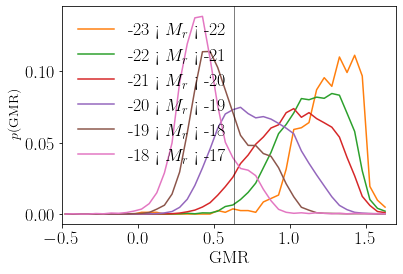

In [6]:
color_plot('GMR', max_col=1.7)

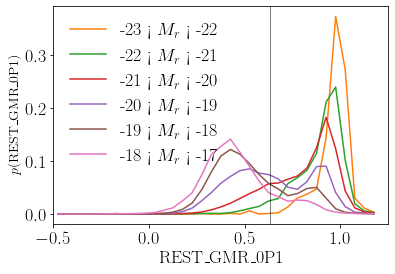

In [7]:
color_plot('REST_GMR_0P1', max_col=1.25)

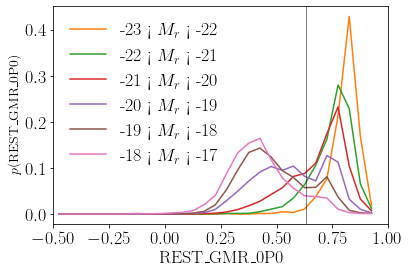

In [8]:
color_plot('REST_GMR_0P0')

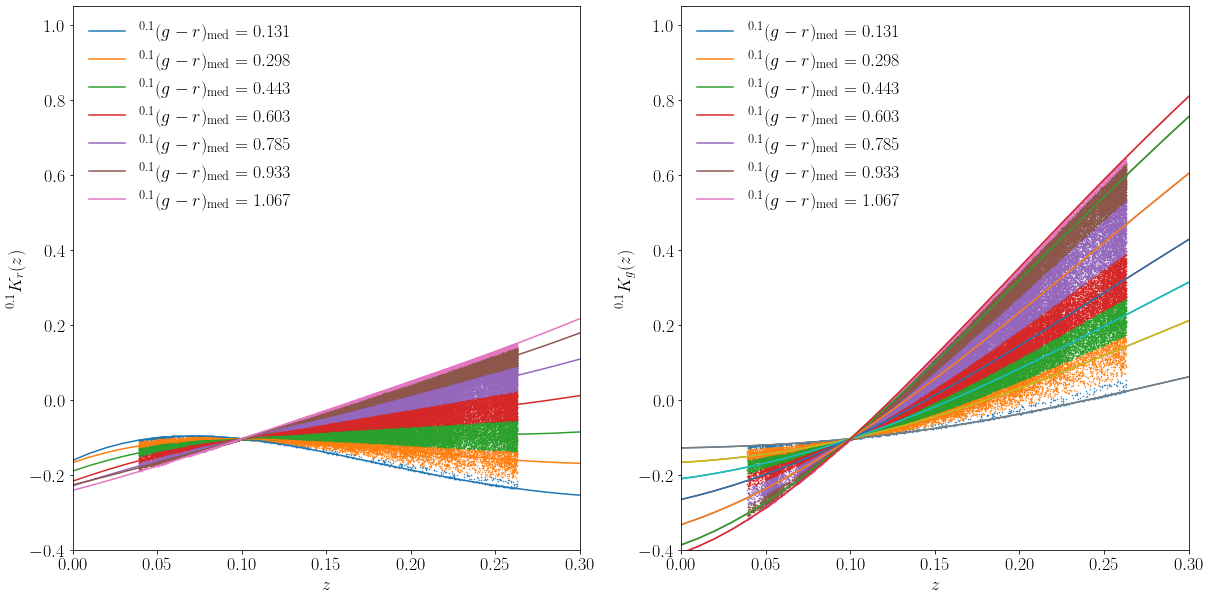

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))

test_plots(axes)

for idx in np.unique(gama_kE['REST_GMR_0P1_INDEX']):
    isin = gama_kE['REST_GMR_0P1_INDEX'] == idx
      
    n_in = np.count_nonzero(isin)
        
    axes[0].scatter(gama_kE['ZGAMA'][isin], gama_kE['KCORR_R0P1'][isin], s=0.25)
    axes[1].scatter(gama_kE['ZGAMA'][isin], gama_kE['KCORR_G0P1'][isin], s=0.25)
    
    axes[0].set_xlim(0, 0.3)
    axes[1].set_xlim(0, 0.3)

    axes[0].set_ylim(-0.4, 1.05)
    axes[1].set_ylim(-0.4, 1.05)
    
axes[0].legend(ncol=1, frameon=False, loc=2)

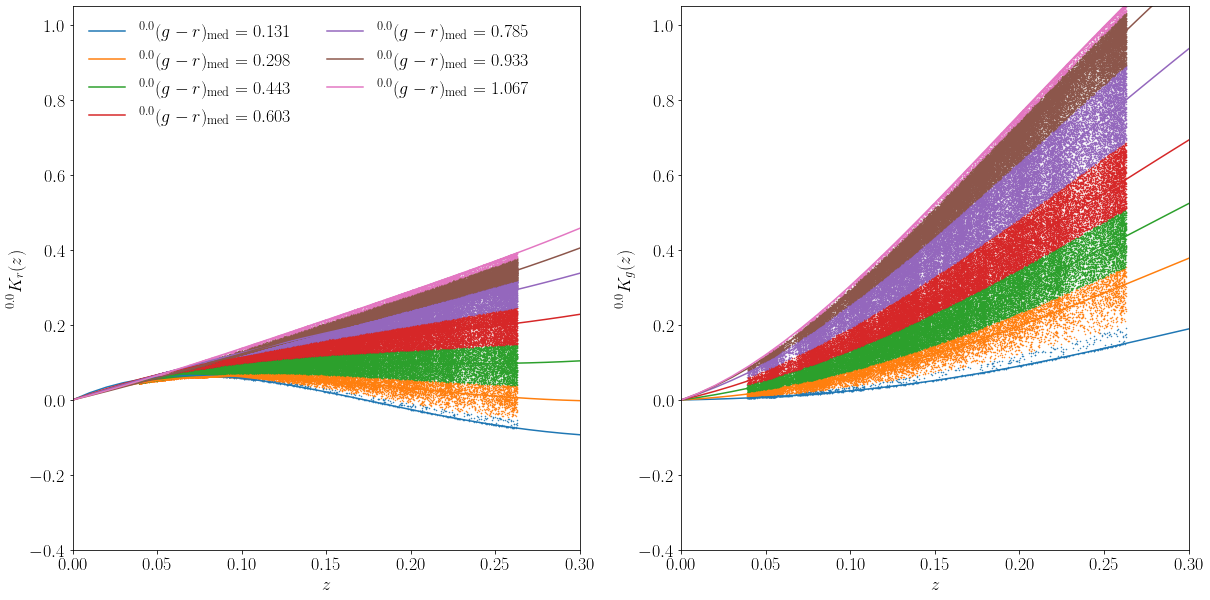

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))

test_nonnative_plots(axes, 0.0)

for idx in np.unique(gama_kE['REST_GMR_0P1_INDEX']):
    isin = gama_kE['REST_GMR_0P1_INDEX'] == idx
        
    axes[0].scatter(gama_kE['ZGAMA'][isin], gama_kE['KCORR_R0P0'][isin], s=0.25)
    axes[1].scatter(gama_kE['ZGAMA'][isin], gama_kE['KCORR_G0P0'][isin], s=0.25)
    
    axes[0].set_xlim(0, 0.3)
    axes[1].set_xlim(0, 0.3)

    axes[0].set_ylim(-0.4, 1.05)
    axes[1].set_ylim(-0.4, 1.05)
    
axes[0].legend(ncol=2, frameon=False, loc=2)

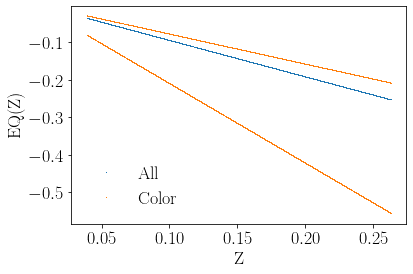

In [11]:
pl.plot(gama_kE['ZGAMA'], gama_kE['EQ_ALL_0P0'], marker=',', lw=0.0, label='All')
pl.plot(gama_kE['ZGAMA'], gama_kE['EQ_COLOR_0P0'], marker=',', lw=0.0, label='Color')

pl.xlabel('Z')
pl.ylabel('EQ(Z)')

pl.legend(frameon=False)

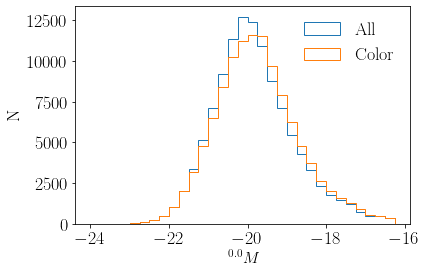

In [12]:
_ = pl.hist(gama_kE['MALL_0P0'], histtype='step', bins=np.arange(-24., -16.0, 0.25), label='All')
_ = pl.hist(gama_kE['MCOLOR_0P0'], histtype='step', bins=np.arange(-24., -16.0, 0.25), label='Color')

pl.xlabel(r'$^{0.0}M$', fontsize=16)

pl.ylabel('N')

pl.legend(frameon=False)

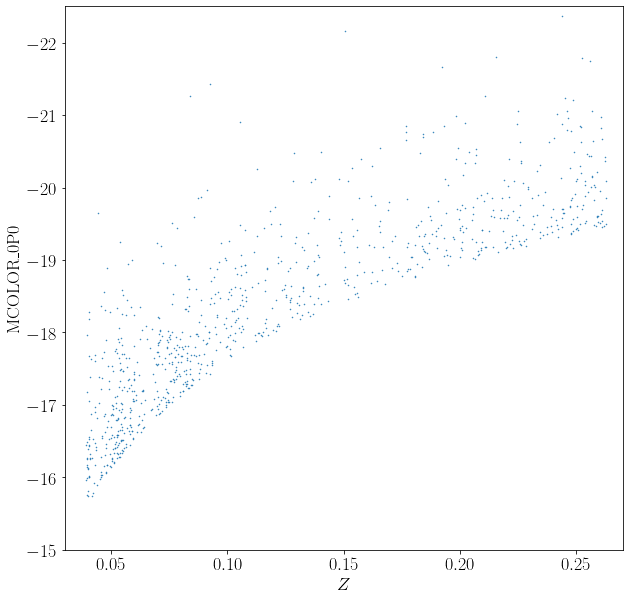

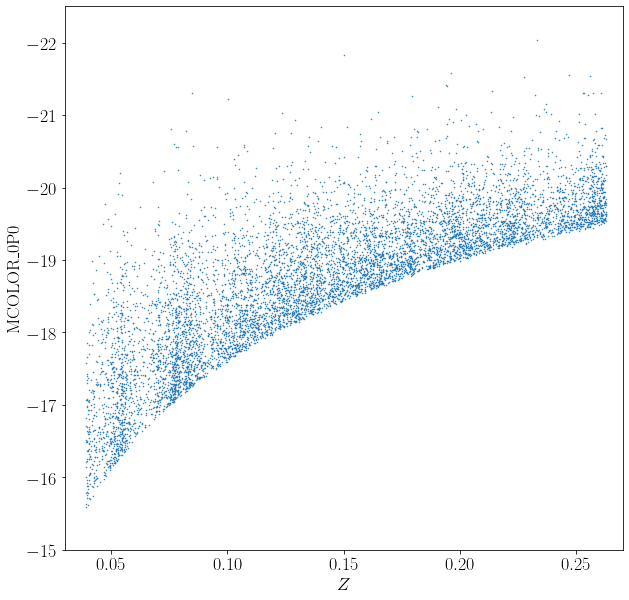

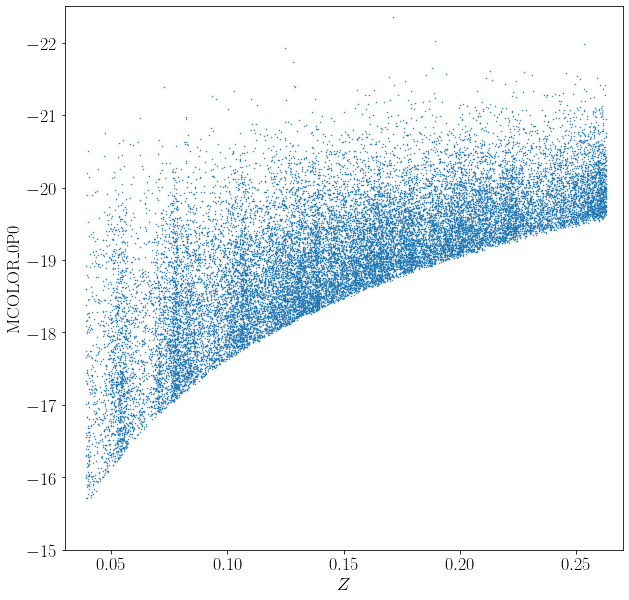

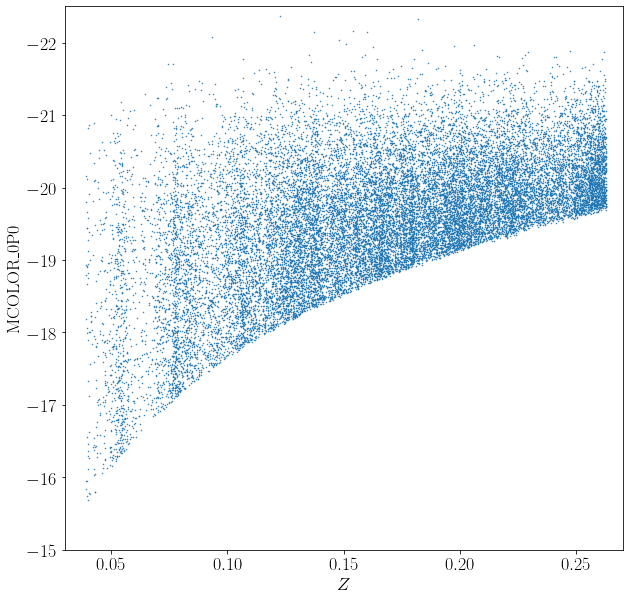

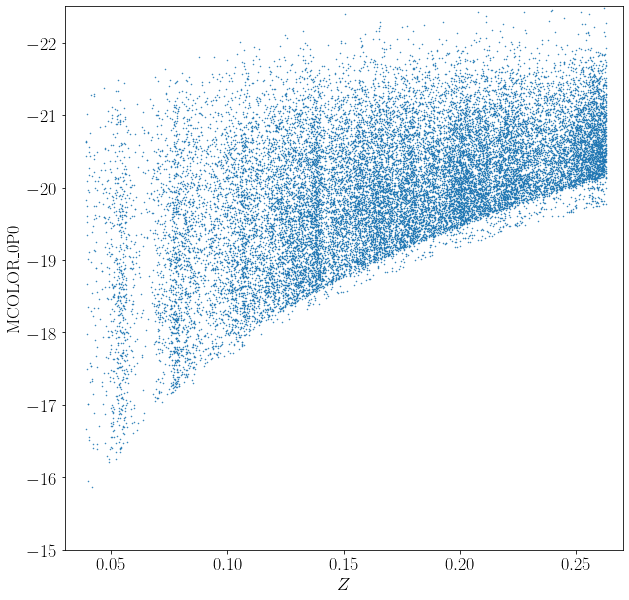

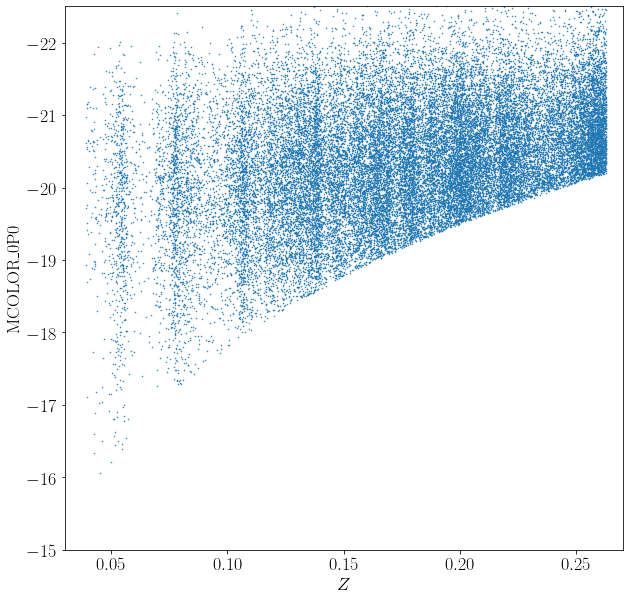

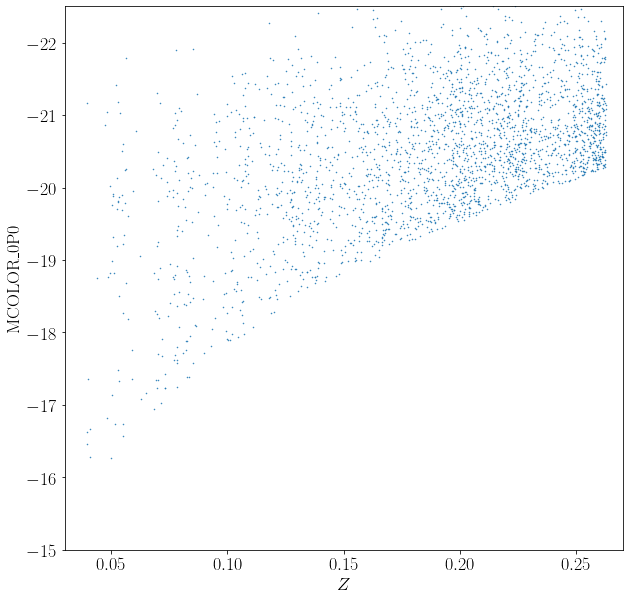

In [13]:
for idx in np.unique(gama_kE['REST_GMR_0P1_INDEX']):
    fig, ax = plt.subplots(1,1,figsize=(10,10))
    pl.sca(ax)
    
    isin = gama_kE['REST_GMR_0P1_INDEX'] == idx

    plt.scatter(gama_kE['ZGAMA'][isin], gama_kE['MCOLOR_0P0'][isin], s=0.25)

    plt.xlabel(r'$Z$')
    plt.ylabel(r'MCOLOR_0P0')
    plt.xlim(0.03, 0.27)
    plt.ylim(-15., -22.5)    
    pl.show()

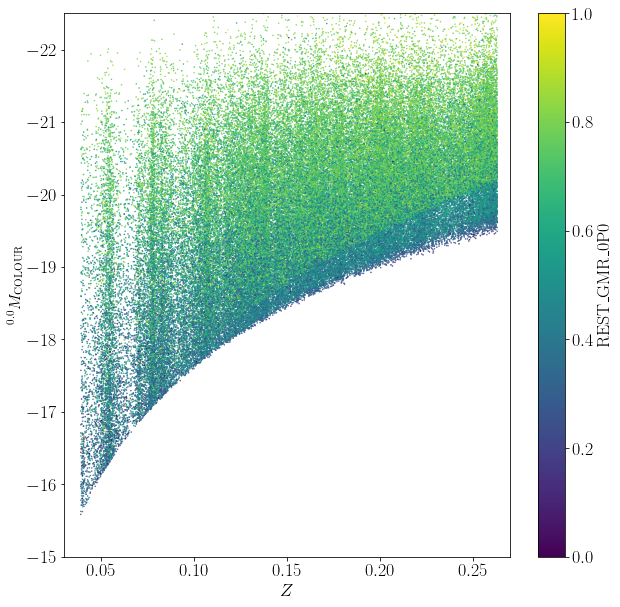

In [14]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
pl.sca(ax)

plt.scatter(gama_kE['ZGAMA'], gama_kE['MCOLOR_0P0'], c=gama_kE['REST_GMR_0P0'], s=0.25, vmin=0.0, vmax=1.0)
plt.xlabel(r'$Z$')
plt.ylabel(r'$^{0.0}M_{\rm COLOUR}$', fontsize=16)

plt.xlim(0.03, 0.27)
plt.ylim(-15., -22.5)
plt.colorbar(label='REST_GMR_0P0')

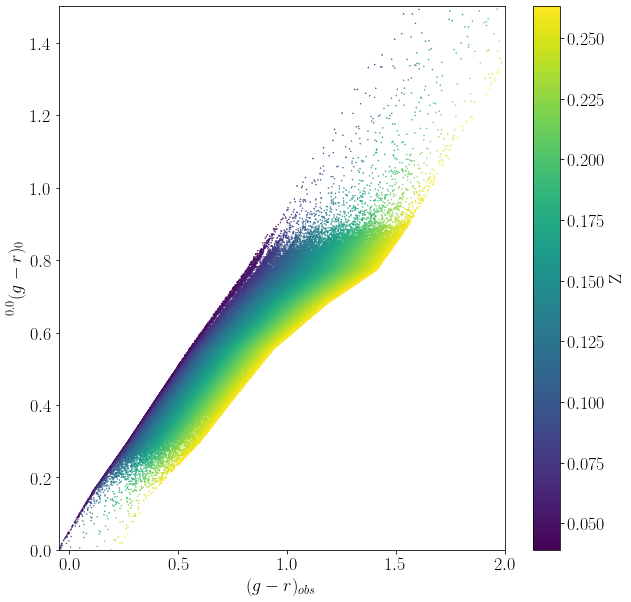

In [15]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
pl.sca(ax)

plt.scatter(gama_kE['GMR'], gama_kE['REST_GMR_0P0'], c=gama_kE['ZGAMA'], s=0.25)
plt.xlabel(r'$(g-r)_{obs}$')
plt.ylabel(r'$^{0.0}(g-r)_0$')
plt.xlim(-0.05, 2.0)
plt.ylim( 0.0, 1.5)
plt.colorbar(label='Z')

In [16]:
np.unique(gama_kE['REST_GMR_0P1_WARN'].data)

masked_array(data=[0, 1, 2],
             mask=[False, False, False],
       fill_value=999999,
            dtype=int32)

In [17]:
spurious = gama_kE[gama_kE['REST_GMR_0P1_WARN'].data > 0]
spurious.sort('GMR')
spurious

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD,FIELD,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,GMR,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,Z_THETA_QALL,Z_THETA_QCOLOR
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,Mpc,,,,,,mag,,,,,,,,mag,mag,,,mag,mag,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,bytes4,float64,float64,float64,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64
300927,587726032227270668,131.3272206,1.09080836,18.831516,0.11724,4,G09_Y1_BN1_028,6,24.28935,17.80039,19.094442,18.916586,18.537155,383.7810583202455,37.92041768068411,G9,-226.79743979434815,257.91088559871883,6.539381410623125,-1.2940521,-99.0,2,1,-0.11355235418874031,-0.09522954963899631,0.04772836511763377,0.03261506184962844,-1.2789388207554322,2.12,-0.1137228,-0.24854878,-19.02290697872411,-18.888081004021274,37.85442324459325,37.719597269890414
250320,587726015084036103,214.45952369,2.03787936,19.563774,0.05858,4,G15_Y4_218_043,5,20.229671,18.227365,19.269266,18.401218,16.841839,183.83041848711568,36.32208687932179,G15,-143.09462765722216,-98.19744695063372,6.175298294532694,-1.0419006,-99.0,2,1,-0.09754854334409607,-0.11801539778216788,0.06373217596227801,0.009829213706456869,-0.9879976725098039,2.12,-0.0568226,-0.12418959,-16.76522234469156,-16.697855353499456,36.32899645357828,36.261629462386175
3586069,587729150376542291,134.93433216,-1.68857138,19.048208,0.1016,4,G09_Y4_207_081,6,21.36026,21.069447,18.996756,18.712885,18.48635,328.96735095614054,37.58576398818161,G9,-210.82732477354077,211.31114633862657,-8.799596788715686,2.072691,-99.0,2,1,-0.10426733235617135,-0.10277204141208078,0.057013386950202735,0.025072570076543968,2.1046317806187758,0.8,-0.098552,-0.08128,-18.496017134934633,-18.513289137929647,37.54422537162897,37.56149737462398
463329,587729774758658180,212.50919903,-1.23042467,18.993248,0.11687,4,G15_Y1_AX2_304,6,21.856676,21.307579,19.185923,18.606459,18.508097,382.47198080656693,37.91299812520232,G15,-288.7231411736381,-184.00210274916608,-7.353532192291313,2.1216564,-99.0,2,1,-0.11330226386937975,-0.09542074191814612,0.04797845543699433,0.03242386957047863,2.1372110037131953,0.8,-0.11336391,-0.093496,-18.85436468805833,-18.8742325925426,37.847612673898176,37.86748057838245
106622,587722984440529032,216.71278177,0.96640172,18.756065,0.14396,4,G15_Y1_DN2_023,6,21.890177,20.875301,18.743675,18.292803,17.95915,479.88461679130455,38.405684141934145,G15,-336.23648543054406,-250.7396546567538,7.075228317101729,2.1316261,-99.0,2,1,-0.1345413892617163,-0.07978275998180517,0.026739330044657783,0.048061851506819575,2.1103036076882287,0.8,-0.13964121,-0.115168,-19.53671689288964,-19.561190105549,38.29278226154198,38.31725547420134
376803,587727943490601117,135.15747214,1.46673551,19.284964,0.05207,4,G09_Y2_010_233,6,18.484238,19.773998,17.6414,17.31554,17.007395,162.60301546426533,36.05564297650389,G9,-109.551159176484,108.95062575855222,3.956085676070129,2.1325989,-99.0,2,1,-0.09974506342315637,-0.11966564751392851,0.061535655883217716,0.008178963974696238,2.1859555688616465,0.8,-0.0505079,-0.041656,-16.781707125225253,-16.790559025922008,36.06667073301334,36.075522633710094
64501,587722982831030680,219.36930883,-0.26832705,18.0969,0.13763,4,G15_Y3_033_005,6,21.164711,20.593689,18.45563,18.068895,17.772223,456.840701987018,38.29882395102362,G15,-310.4414926574121,-254.72114847805562,-1.8806327533873746,2.1380596,-99.0,2,1,-0.1291273968767528,-0.08373353714976081,0.032153322429621295,0.04411107433886394,2.1261018641796245,0.8,-0.1335011,-0.110104,-20.100575235951908,-20.12397233145333,38.197476175893314,38.22087327139474
422141,587728879792685436,129.64207134,2.58860397,19.5044,0.13235,

# Done.